In [168]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
%matplotlib inline
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean*2      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'text.fontsize': 14,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

# --------------- Latex Plot Beautification --------------------------

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


loading  /Users/austin/FUSE/shared/users/asousa/WIPP/WIPPy/rays/kp0_30sec/newray6596.dat
[  7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.
  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.
  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.
  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.]


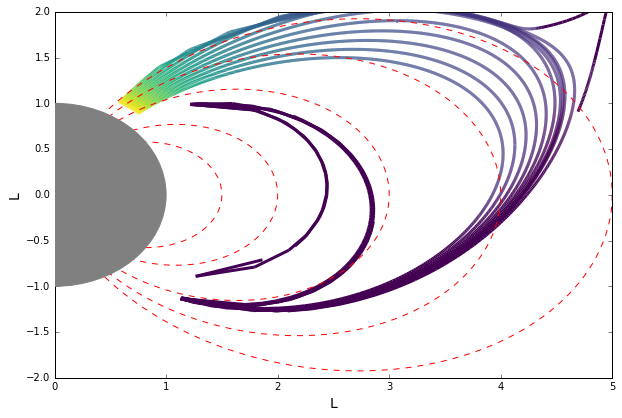

In [167]:
from matplotlib import collections  as mc
from load_rayfile import load_rayfile
directory = '/Users/austin/FUSE/shared/users/asousa/WIPP/WIPPy/rays/kp0_30sec/'
frequency = 6596

L_shells = [1.5, 2, 3, 4, 5]

l_min = 50
l_max = 60




RF = load_rayfile(directory, frequency)
all_lats = np.array(sorted(RF.keys()))
lats = all_lats[(all_lats >= l_min) & (all_lats <= l_max)]
print all_lats

# Initialize plot
fig, ax = plt.subplots()

# Plot the earth
earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)

# Plot the fieldlines
for L in L_shells:
    lam = np.linspace(-80,80,181)
    L_r = L*pow(np.cos(lam*sc.D2R),2)
    Lx  = L_r*np.cos(lam*sc.D2R)
    Ly  = L_r*np.sin(lam*sc.D2R)
    plt.plot(Lx,Ly,color='r',linewidth=1,linestyle='dashed')  # Field line

# Plot the rays
for l in lats:    
    X = RF[l].distre*np.cos(RF[l].lat*np.pi/180.0)
    Y = RF[l].distre*np.sin(RF[l].lat*np.pi/180.0)
    # pick colormap here
    C = plt.cm.viridis(RF[l].power)
    points = np.array([X, Y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = mc.LineCollection(segments, colors=C,alpha=1,linewidth=3)
#     lc.set_linewidth(10)

    ax.add_collection(lc)
    

ax.add_patch(earth)                    # The earth (round)

ax.autoscale()
ax.set_xlim([0, 5])
ax.set_ylim([-2, 2])
ax.set_xlabel('L')
ax.set_ylabel('L')



plt.show()




In [149]:
RF[7.0]

,tg,distre,lat,delta,tp,l_sh,psi,psiray,psires,mu,dens,anH,anHe,anO,fH,stixP,stixR,stixL,power
2,0.000000,1.156986,7.000000,0.000000,0.000000,1.174429,-76.202942,-10.842142,-89.099121,36.644279,2.053403e+04,1642.7227,410.68066,1.848063e+04,580.71686,-1.822726e+04,303.73187,-294.71805,1.000000
3,0.001181,1.159772,6.695530,0.617039,0.001081,1.175755,-76.169937,-10.857046,-89.093689,35.514786,1.915408e+04,1744.2158,423.65173,1.698621e+04,575.49878,-1.700236e+04,285.90594,-277.39621,0.996960
4,0.002364,1.162577,6.381436,1.269945,0.002161,1.177119,-76.121689,-10.884329,-89.088982,34.414181,1.788200e+04,1850.3782,436.63138,1.559499e+04,570.32098,-1.587323e+04,269.35117,-261.32376,0.993929
5,0.003549,1.165396,6.057738,1.959653,0.003242,1.178520,-76.057350,-10.924695,-89.085091,33.344639,1.671262e+04,1960.8641,449.51929,1.430224e+04,565.19568,-1.483525e+04,254.02245,-246.45575,0.990914
6,0.004736,1.168222,5.724522,2.686821,0.004322,1.179962,-75.976196,-10.978698,-89.082108,32.308384,1.564068e+04,2075.2029,462.20425,1.310328e+04,560.13556,-1.388377e+04,239.87274,-232.74512,0.987923
7,0.005924,1.171050,5.381937,3.451769,0.005403,1.181443,-75.877693,-11.046681,-89.080116,31.307650,1.466089e+04,2192.7944,474.56668,1.199353e+04,555.15387,-1.301409e+04,226.85284,-220.14267,0.984964
8,0.007114,1.173873,5.030202,4.254419,0.006483,1.182967,-75.761551,-11.128738,-89.079178,30.344637,1.376792e+04,2312.9131,486.48178,1.096852e+04,550.26416,-1.222148e+04,214.91150,-208.59712,0.982045
9,0.008306,1.176683,4.669600,5.094237,0.007564,1.184534,-75.627785,-11.224658,-89.079338,29.421450,1.295642e+04,2434.7200,497.82404,1.002388e+04,545.48016,-1.150120e+04,203.99548,-198.05524,0.979175
10,0.009499,1.179475,4.300478,5.970189,0.008644,1.186145,-75.476776,-11.333893,-89.080597,28.540024,1.222107e+04,2557.2820,508.47208,9.155320e+03,540.81543,-1.084850e+04,194.04977,-188.46199,0.976363
11,0.010694,1.182240,3.923230,6.880713,0.009725,1.187800,-75.309273,-11.455541,-89.082947,27.702072,1.155658e+04,2679.6011,518.31409,8.358665e+03,536.28333,-1.025871e+04,185.01788,-179.76089,0.973618


In [62]:
np.max(plt.cm.jet(RF[l].power))

1.0

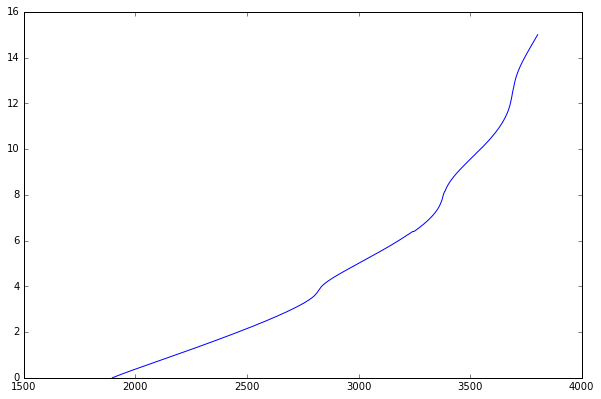

In [123]:
plt.plot((RF[43].tg))

In [125]:
EAa = gen_EA_array(3)
EAa


,lam,x1,x2,y1,y2,EAa,EAb,EAc,EA_length
0,0,2.900000,3.100000,0.000000,0.000000,0.000000,0.200000,0.000000,1275600.000000
1,5,2.871425,3.060340,0.234304,0.284658,-0.050355,0.188915,0.100326,1246965.098131
2,10,2.785672,2.945001,0.460301,0.550171,-0.089870,0.159329,0.177010,1166712.376475
3,15,2.643702,2.763624,0.668163,0.780726,-0.112562,0.119922,0.217454,1049013.871328
4,20,2.449441,2.529175,0.846812,0.965256,-0.118444,0.079734,0.222602,910657.357429
5,25,2.210807,2.255806,0.985711,1.097105,-0.111394,0.044999,0.201915,766252.113856
6,30,1.939278,1.957836,1.076786,1.173214,-0.096429,0.018558,0.167019,626307.166766
7,35,1.648617,1.649338,1.115634,1.193619,-0.077985,0.000721,0.127763,497407.623667
8,40,1.353408,1.343792,1.101958,1.161261,-0.059303,-0.009616,0.090858,383175.901420
